<a href="https://colab.research.google.com/github/mrefugionv/S13----GIMNASIO_ML/blob/main/P13_PRONOSTICOS_PREDICCIONES_MODEL_FITNESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Sprint # 13: Pronósticos y predicciones

## Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:
* Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
* Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
* Analizar los factores que más impactan la pérdida.
* Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente: identificar a los grupos objetivo; sugerir medidas para reducir la rotación; describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

## 1. Descargar los datos

Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

* 'Churn' — la cancelación para el mes en cuestión
  
Campos de dataset actuales:
Datos del usuario del mes anterior :
* 'gender'.
* 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
* 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos).
* Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
* 'Phone' — si el/la usuario/a aportó el número de teléfono.
* 'Age'.
* 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
* 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
* 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
* 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
* 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
* 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
* 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

In [ ]:
# IMPORTACIÓN DE LIBRERÍAS NECESARIAS
import pandas as pd   #Uso de DF y series
import matplotlib.pyplot as plt # Graficar
import seaborn as sns #Mapas de calor

from sklearn.preprocessing import StandardScaler    # Estandarización de datos
from sklearn.model_selection import train_test_split #División datos

from sklearn.linear_model import LogisticRegression # Regresión Logític
from sklearn.ensemble import RandomForestClassifier #Bosque aleatorio

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Metricas de clasificación

from sklearn.cluster import KMeans #Metodo kmeans de clustering

from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
data = pd.read_csv('datasets/gym_churn_us.csv')

## 2. EDA : Análisis exploratorio

### 2.1 Observa el data set



#### ¿Contiene alguna característica auscente?

*Observaciones:*
  
No tenemos valores auscentes, todos los campos estan completos.

Observamos también que los campos con tipo de dato entero se pueden interpretar como booleanos , 0 si es falso y 1 si se cumple la condición. Se mantienen como enteros ya que se haran cálculos estadísticos.

In [ ]:
def col_name_snakecase(data):
    new_col_names =[]

    for old_name in data.columns:
        name_stripped = old_name.strip()
        name_lowered = name_stripped.lower()
        name_no_spaces = name_lowered.replace(' ','_')
        new_col_names.append(name_no_spaces)

    data.columns = new_col_names
    return(data)

data = col_name_snakecase(data)
print(data.info())
display(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


#### Estudia los valores promedio y la desviación estándar

Observamos que tenemos menos de un tercio de los datos son personas que ya desertaron (26%). En general, los usuarios suelen ir de entre 3 y 7 meses, de 1 a 3 veces por semana y se encuentran en un rango de edad de entre los 25 y 32 años. Los datos tambien indican que el uso del gimnasio es parecido para hombres y mujeres (51%), que los usuarios suelen vivir o trabajar cerca del vecindario (84%). Y sobre las estrategias para atraer más clientes: los empleados de las empresas asociadas representan aproximadamente la mitad de los usuarios (48%) y la oferta "trae a un amigo" atrajo un 30% de los usuarios.

In [ ]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### 2.2 Valores medios de las caracteríticas en grupos

Obtener los valores medios de las características para el grupo de personas que se fueron (cancelación) y para el grupo de personas que se quedaron.

*Observaciones :*

Donde se observan diferencias sustanciales son en las siguientes características:  que los que se quedan suelen gastar más dinero en otros servicios del gimnasio (avg_additional_charges_total), tener contractos más largos (contract_period), quedan más meses para el termino del contrato (month_to_end_contract),tiene un ciclo de vida mucho mayor (lifetime), suelen ir a más clases por semana.

Otras características que presentan mayor proporción para los que deciden quedarse son: contract_period, group_visits; y en menor medida afectan:  near_location, partner, promo_friends.

Además vemos una diferencia significativa entre la frecuencia semanal de clases y las veces que fue a clases el último mes para los usuarios que decidieron darse de baja.


In [ ]:
data.groupby(by='churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### 2.3 Histogramas.
Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

*Observaciones:*

* gender - Hombres y mujeres son proporcionales para ambos grupos (los que se quedan y los que se fueron).
* near_location - Los que permanecen tiene una proporción mayor (5 veces mayor) de usuarios que viven o trabajan cerca del gimnasio.
* partner - Para los usuarios que permanecen la mitad son empleados de empresas asociadas y la otra mitad no, por lo que no es un parámetro decisivo.
* promo_friend - Para los usuarios que permanecen la mitad se uniron por la promoción , de los que decidiron marcharse solo una cuarta parte tenían la promoción. Sí afecta en la decisión.
* phone - En ambos grupos la mayoría ha proporcionado su número telefónico. No es un parámetro de interes.
* contract_period - para los que se quedan eligen planes de más meses ( 44% 2 meses, 25% 6 meses, 29% 12 meses), mientras que los que se van la mayoría (90%) tenía un plan de 2 meses.
* group_visits - practicamente la mitad de los que deciden quedarse asiste a sesiones grupales, mientas que en el grupo que se va solo el 29% asiste a estas sesiones.
* age - Los que suelen irse son menores (24-32 años) a los que deciden quedarse (27-34 años)
* avd_additional_charges - los que se van gastan menos en servicios adicioneles ( con una media de 100 y hasta 300) mientras que los que se quedan ( con una media de  casi 200 y hasta llegar a cuentas mayores de  400)
* month_to_end_contract - los que deciden irse se van qudando 1 mes para el fin de su contracto. Sin embargo, hay no es un parámetro decisivo mayor cantidad de personas, a un mes del termino de su contrato,  que se fueron decidieron quedarse.
* lifetime - Los que se van suelen tener meso de 4 meses asistiendo, mientras que los que se permanecen además del boom de los primeros meses la gran mayoría lleva más de 5 meses y hasta 20.
* avg_class_frequency_total- Los que se van tienden a ir a menos de 2 sesiones por semana, mientras que los que se quedan a más de 2 sesiones.
* avg_class_frequency_last_month - Esta gráfica se modifica con respecto a la anterios para los usurios que se van, tienden a disminuir los días por semana que asisten en su ultimo mes. Mientras que para los que permanecen las gráfica permanece practicamente identica a la anterior.

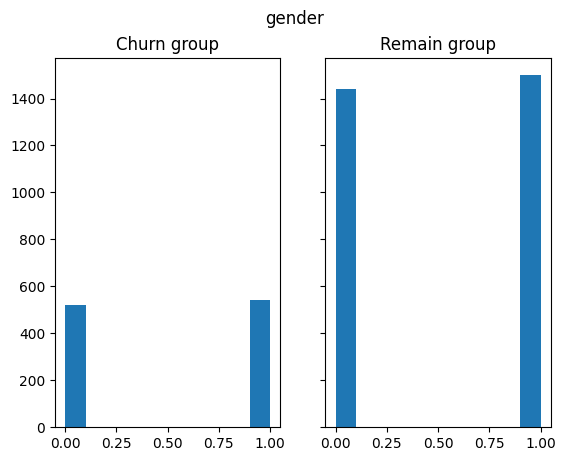

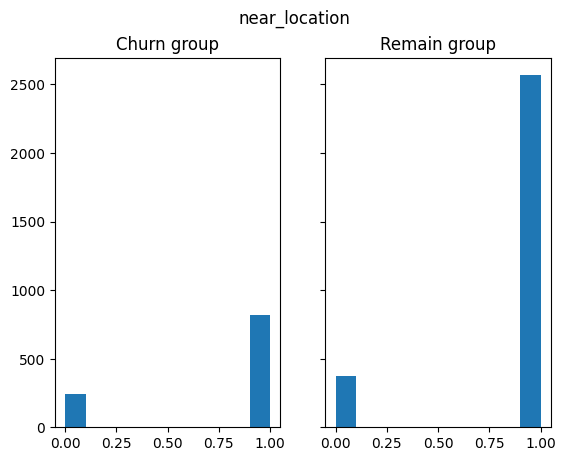

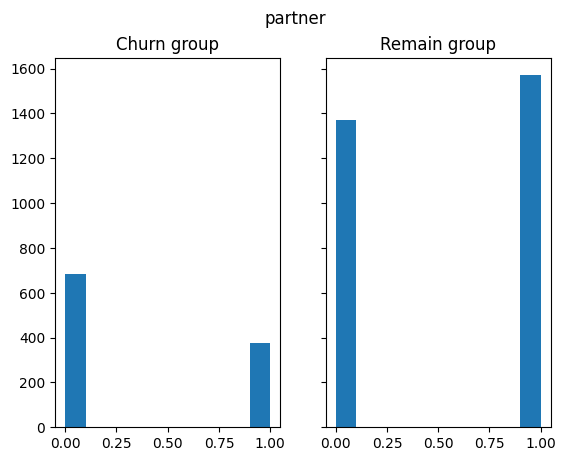

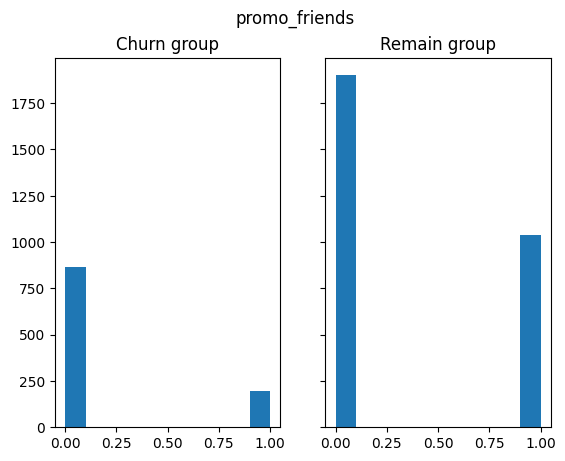

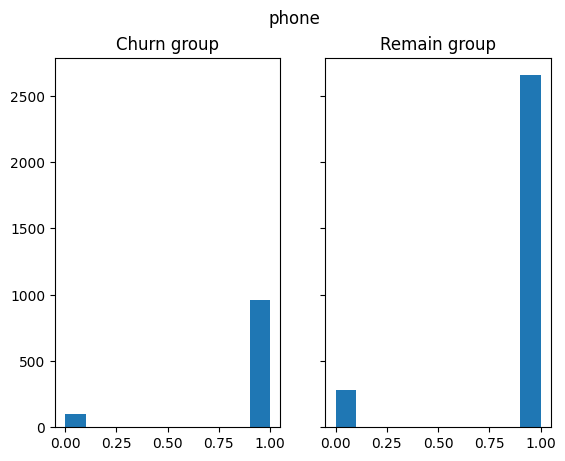

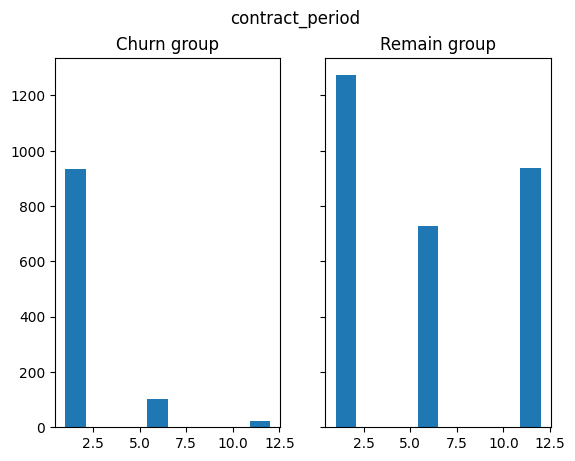

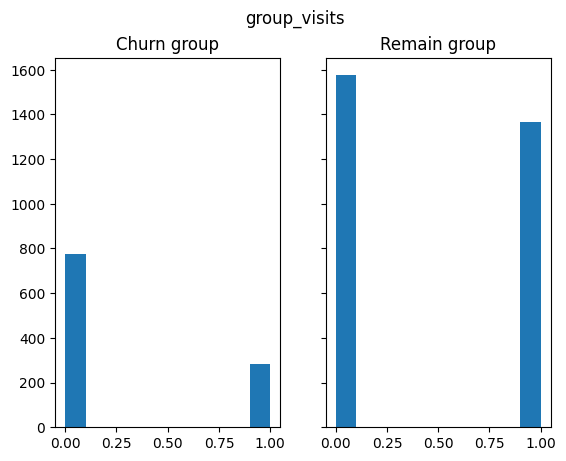

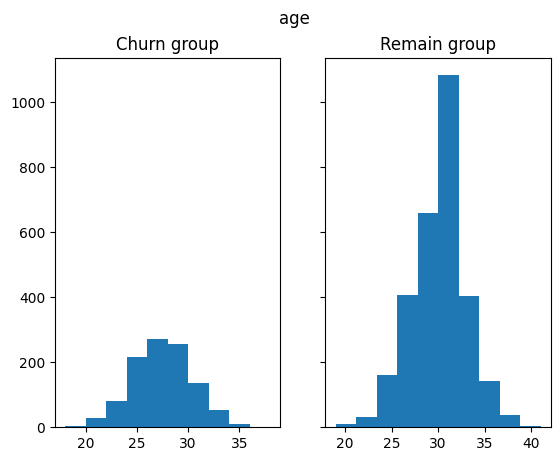

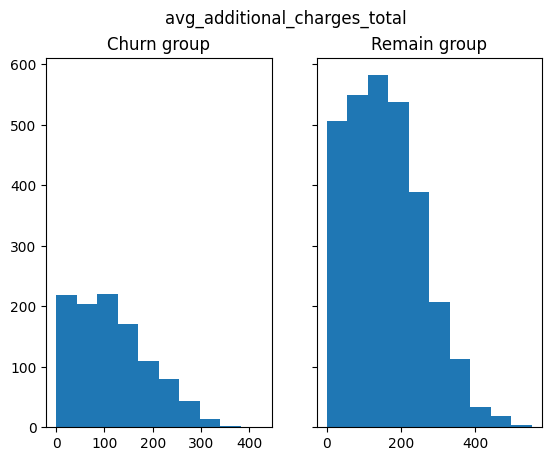

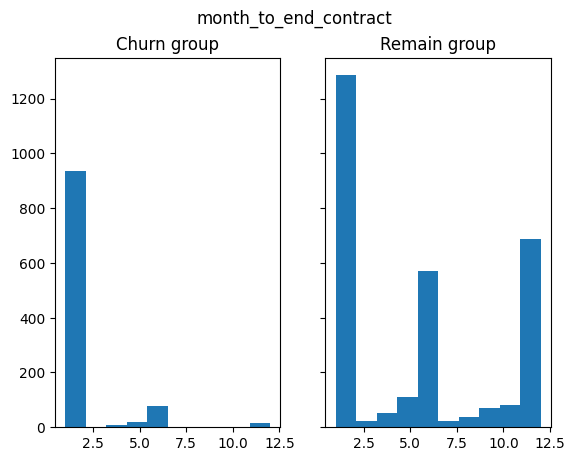

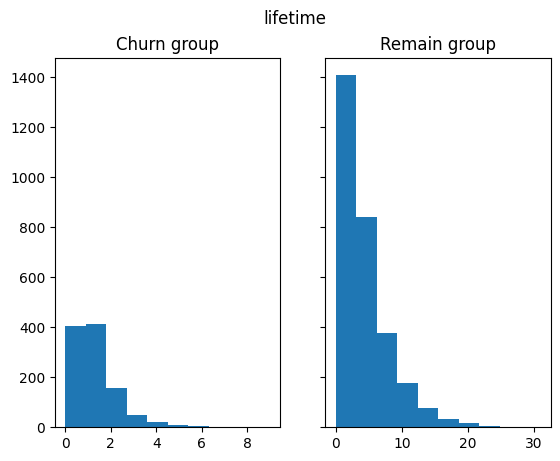

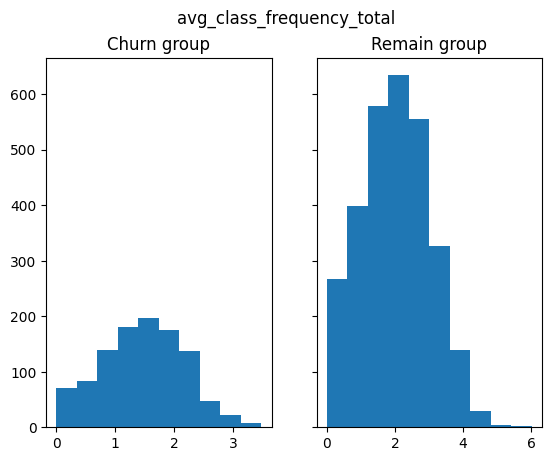

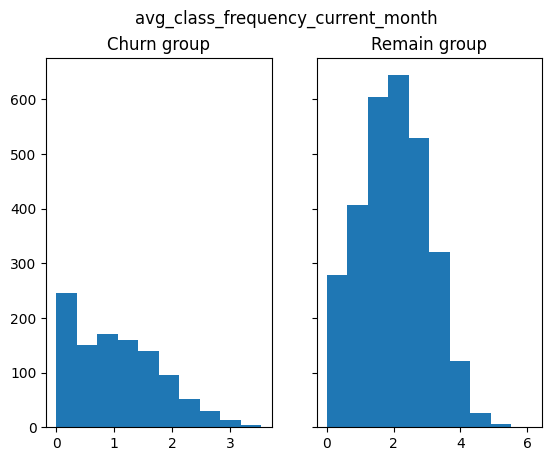

In [ ]:

for col in data.drop('churn', axis=1).columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    fig.suptitle(col)
    ax1.set_title('Churn group')
    ax1.hist(data[data['churn']== 1][col])
    ax2.set_title('Remain group')
    ax2.hist(data[data['churn']== 0][col])


### 2.4 MATRIZ DE CORRELACIÓN

*Observaciones:*

Las características que se relacionan más fuertemente con 'churn' son:
lifetime, avg_class_frecuency_current_month,age, contract_period, month_to_end_contract.

Las características con alta correlación entre sí son:
'contract_period' y 'month_to_end_contract'
'avg_class_frecuency_current_month' y 'avg_class_frecuency_total'

Ya que la multicolineadlidad es un problema para los modelos lineales,se elige trabajar con: 'contract_period'  y no con 'month_to_end_contract', ya que el primero tiene mayor correlación con nuetras variable objetivo 'churn'


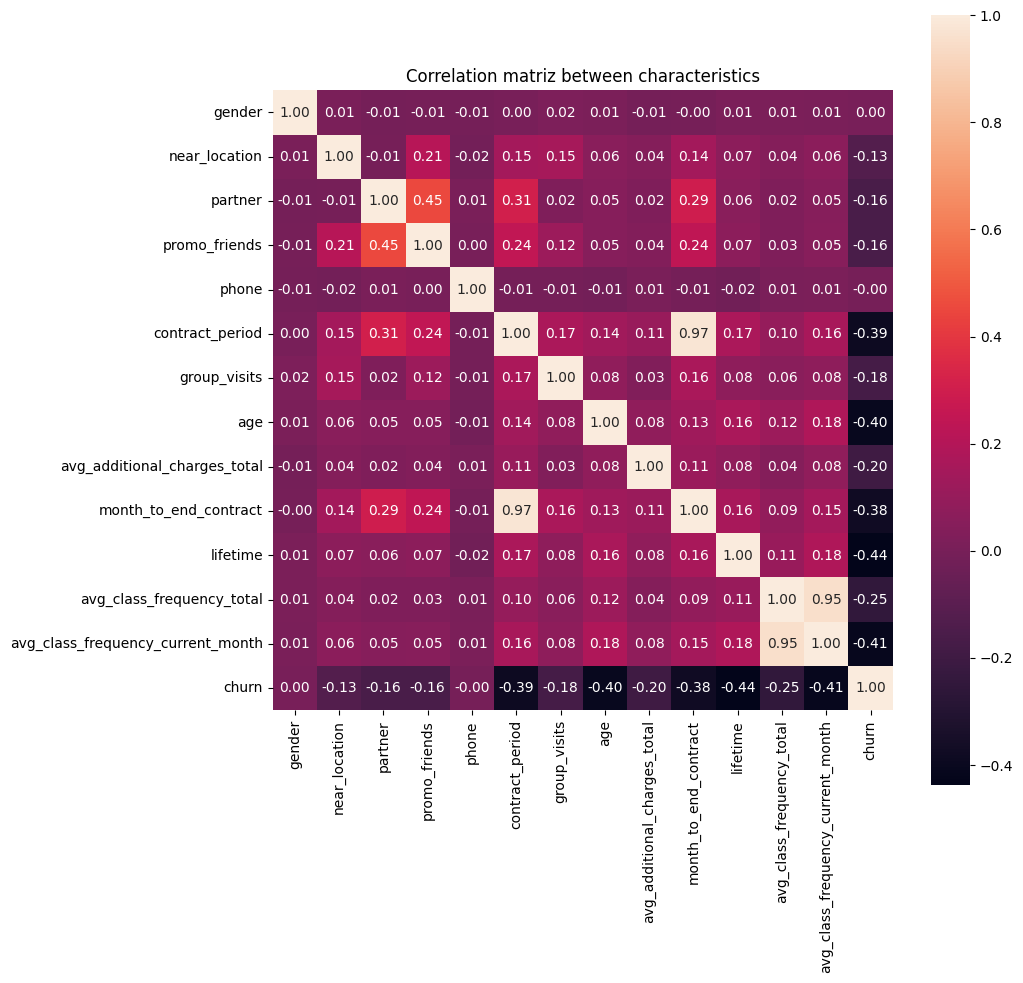

In [ ]:
cm = data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True, fmt=".2f")
plt.title('Correlation matriz between characteristics')
plt.show()

## 3. Modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

*Observaciones:*

Hay dos tipos de modelos supervisados de aprendizaje automático: la clasificaión binaria y la regresión.
La primera se utiliza cuando la característica objetivo solo puede tomar dos valores que indican categorías y la segunda usualmente toma algún valor numérico.



### 3.1 División de datos en conjunto de entrenamiento y validación.

*Observaciones:*

Hay dos fases en la aplicación de un modelo supervisado: el entrenmiento y la validación, en la que se revisa que tanto se ajustan sus predicciones a los resultados esperados.

Es por ello que los datos se segmentan para entrenar el modelo se suele utilizar entre el 70 y 80 % de los datos y para la validación el 30 o 20 %

In [ ]:
X = data.drop('churn',axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### 3.2 Entrena el modelo: Regresión logística y Bosque aleatorio & 3.3 Evalua las métricas : Exactitud, Precisión y Recall

*Observaciones:*

Antes de entrenar los modelos es necesario recordar que la estandarización es absolutamente obligatoria las áreas del ML donde los métodos están basados en la distancia mutua entre objetos como la regresión lineal y el clustering.

En cuanto a las métricas de evalución para determinar que tal funciono el modelo, en esta ocasión utilizaremos las métricas de clasificación:
* Exactitud: Es proporción de predicciones exactas entre todas las predicciones; cuanto más cerca estemos del 100% de exactitud será mejor.
* Precisición: Es la proporción de predicciones en la clase 1 es verdadero. Es útil cuando cada caso puesto en clase 1 cuesta dinero; en este caso cuanto más cerca de 1 es mejor.
* Recall: Es el número de objetos de clase 1 reales que fuiste capaz de descubrir con tu modelo. Cuando no se quere perder casos reales, cuanto más cerca de 1 es mejor.
* F1 : Es el equilibrio entre las métricas precisión y recall. Cuanto más cerca de 1, mejor.

*Resultados:*

En nuestro caso tanto la regresión logística como el bosque aleatorio hicieron un gran trabajo y su métricas se parecen mucho. Solo tenemos la diferencia entre Precisión y Recall.

En este caso como no queremos perder de vista ningún caso en el que el usuario decidio marcharse (churn = 1), le daremos prioridad a un valor más alto de Recall. Por lo que la Regresión Logística nos dió mejores resultados.



In [ ]:
# Estandarización del conjunto de entrenamiento y validación
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

#Lista de modelos a probar
models = [LogisticRegression(), RandomForestClassifier()]

# la función entrena, valida y obtiene métricas del modelo
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Exactitud:{:.2f} Precisión:{:.2f} Recall:{:.2f} F1:{:.2f}'.format(
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)))

# Llama a la función
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train_st, y_train=y_train, X_test=X_test_st, y_test=y_test)


LogisticRegression()
Exactitud:0.92 Precisión:0.85 Recall:0.83 F1:0.84
RandomForestClassifier()
Exactitud:0.91 Precisión:0.84 Recall:0.79 F1:0.82


## 4. Crear clústeres de usuarios/as

*Observaciones:*

El clustering es un modelo de ML no supervisado. El aprendizaje no supervisado se trata de encontrar una similitud entre los objetos para así resolver un problema de agrupamiento.

Hay dos métodos de clustering:  
* K-means - Es rápido y claro, aunque sensible al número de clústeres que definas.
* Clustering jerárquico aglomerativo- No requiere establecer el número de clústeres con antelación y permite visualizar la relación entre objetos (dendrogramas).

Por las características descritas se utilizará primero el clustering jerárquico aglomerativo para poder definir visualmente en cuantos clústeres le pediremos a k-means agrupar.

### 4.1 Estandariza datos

In [ ]:
# Estandarización de los datos
scaler2 = StandardScaler()
X_st = scaler2.fit_transform(X)

### 4.2 Matriz de distancias y dendograma

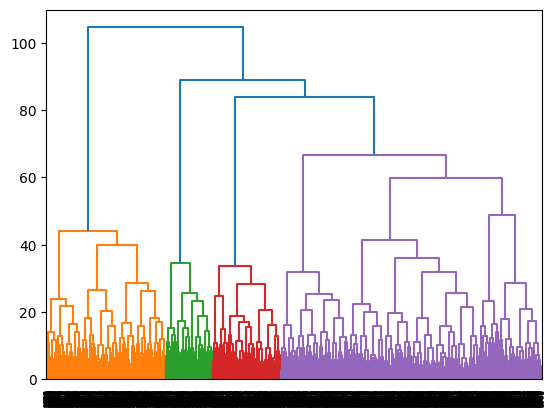

In [ ]:
linkage_data = linkage(X_st, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

### 4.3 Modelo K-Means de Clustering

In [ ]:
# Define el modelo k_means con 5 clústeres
km = KMeans(n_clusters = 5)
# Predice los clústeres para las observaciones
labels = km.fit_predict(X_st)


### 4.4 Valores medios de las características para los clústeres

*Resultados:*

Los clusteres con mayor retención son el 3 (98%), 0 (93%), 4(74%), y los de poca retención son 1 (56%), 2(49%).

Las características que sí podemos diferencias entre los clústesres con mayor retención (0,3,4) y menor retención (1,2) son:
* group visits : para menor retención, es menor a 35%, y para mayor retención, es mayor a 42%.
* age : para menor retención, es menor a 29 años, y para mayor retención, es mayor a 29 años.
* avg_additional_charges_total: para menor retención, es menor a 136 unidad de divisa, y para mayor retención, es mayor a 140 unidades de divisa.
* month_to_end_contract: para menor retención, es menor a 2.3 meses, y para mayor retención, es mayor a 2.4 meses.
* lifetime: para menor retención, es menor a 3 meses, y para mayor retención, es mayor a 3 meses.
* avg_class_frecuancy_total: para menor retención, es menor a 1.7 clases por semana, y para mayor retención, es mayor a 1.8 clases por semana.
* avg_class_frecuancy_current_month: para menor retención, es menor a 1.5 clases por semana, y para mayor retención, es mayor a 1.7 clases por semana.

In [ ]:
# Almacena etiquetas de clúster en dataframe
data['cluster_km'] = labels
# Obtiene las estadísticas de los valores medios de las características por clúster
data_clusters = data.groupby(by='cluster_km').mean()
display(data_clusters)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.486572,1.000000,0.805687,1.000000,0.908373,3.097946,0.451817,29.072670,139.864541,2.876777,3.590837,1.681242,1.564887,0.263823
1,0.500534,0.944504,0.741729,0.489861,0.900747,11.871932,0.551761,29.916756,164.974517,10.864461,4.717182,1.992285,1.983751,0.022412
2,0.592543,0.972037,0.282290,0.117177,0.896138,2.912117,0.484687,30.322237,163.031590,2.668442,5.179760,2.925918,2.930783,0.057257
3,0.494505,0.000000,0.465201,0.076923,0.915751,2.225275,0.214286,28.478022,134.126172,2.089744,2.805861,1.659607,1.469327,0.448718
4,0.484554,1.000000,0.243601,0.010591,0.902030,1.975287,0.322154,28.226831,131.500371,1.893204,2.457193,1.307654,1.072894,0.516328


### 4.4 Distribuciones de las característcas

*Resultados:*

En las distribuciones de la características objetivo con las a continuación enlistadas, es donde se distinguen más claramente las agrupaciones:
* age:  Los que desertan suelen tener menor edad.
* additional_charges: los que permaneces suelen gastar más en otros servicios de l gimnasio.
* lifetime: los que permanecen suelen tener mucho más tiempo asistiendo al gimansio.
* avg_class_frecuancy_current_month: los que desertan asisten a menos sesiones.

Sin embargo la clasificación no es clara en ninguna de las características, para definir con certeza si una persona decidirá irse o quedarse.

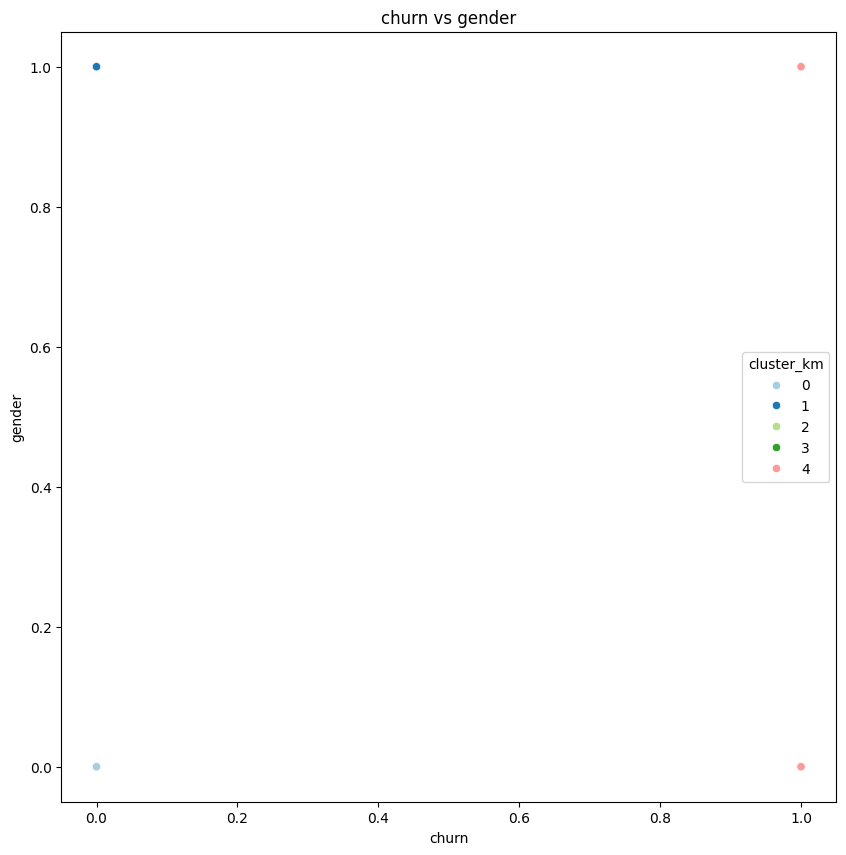

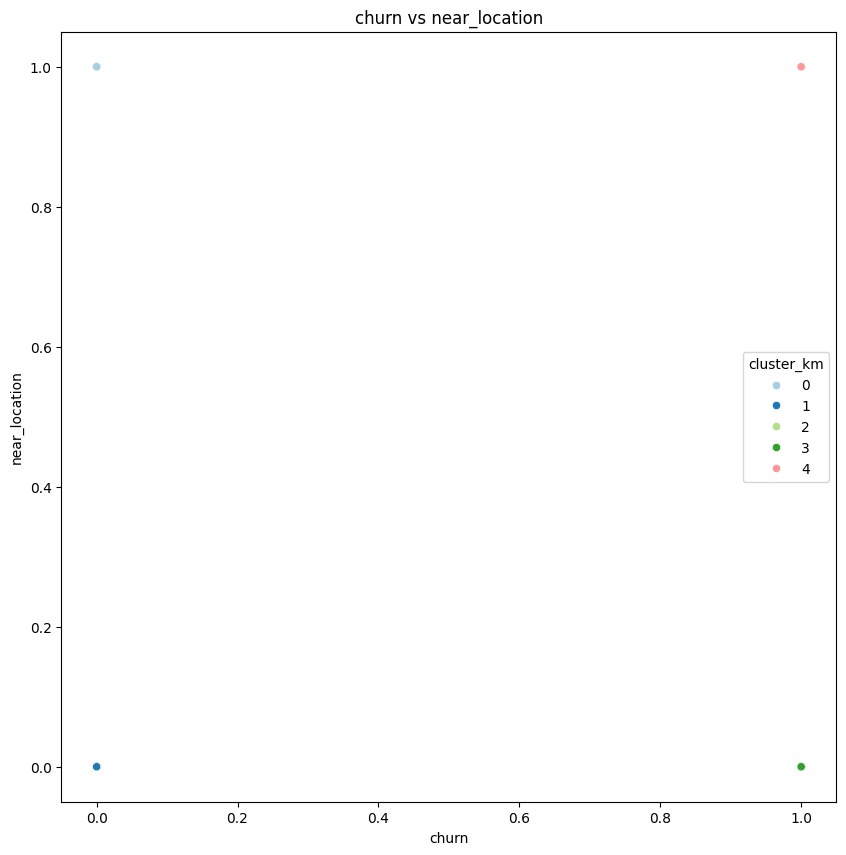

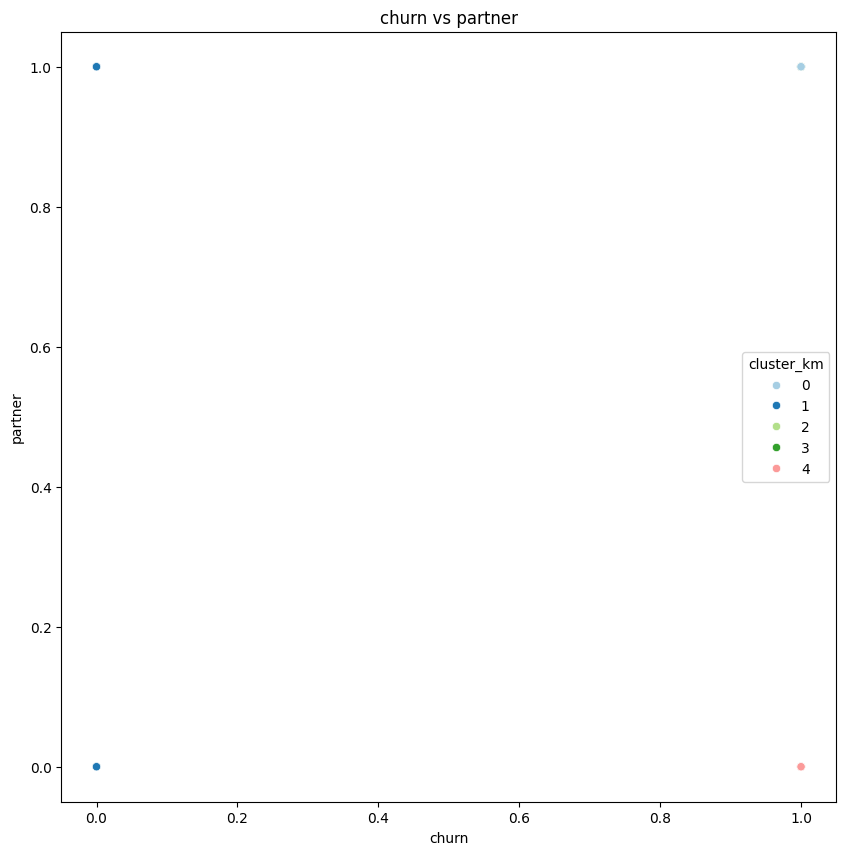

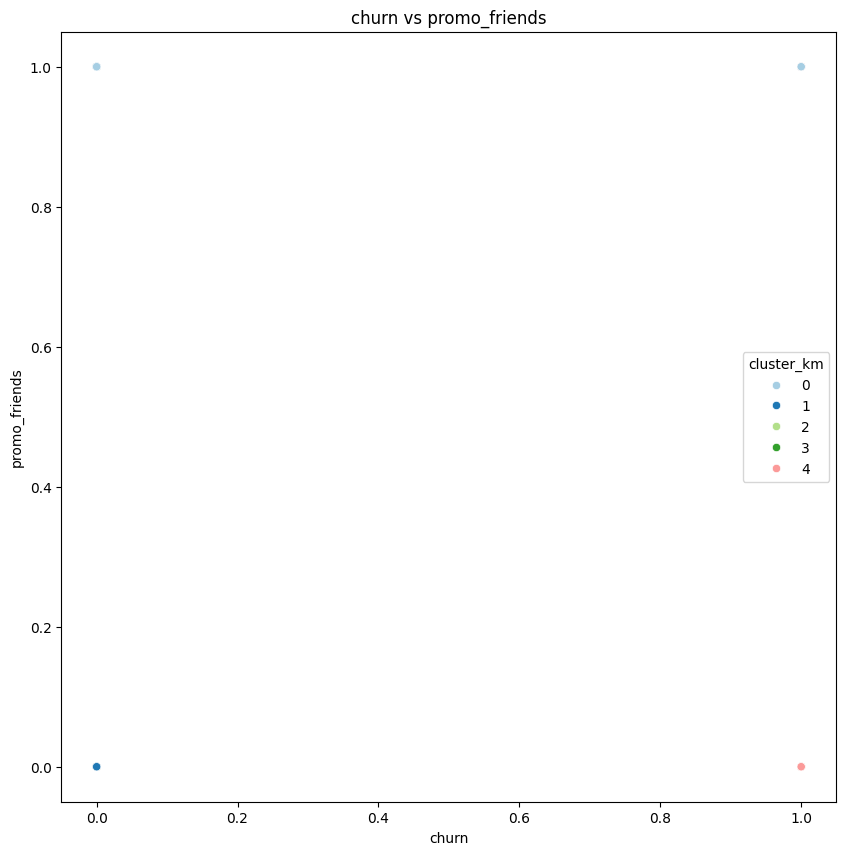

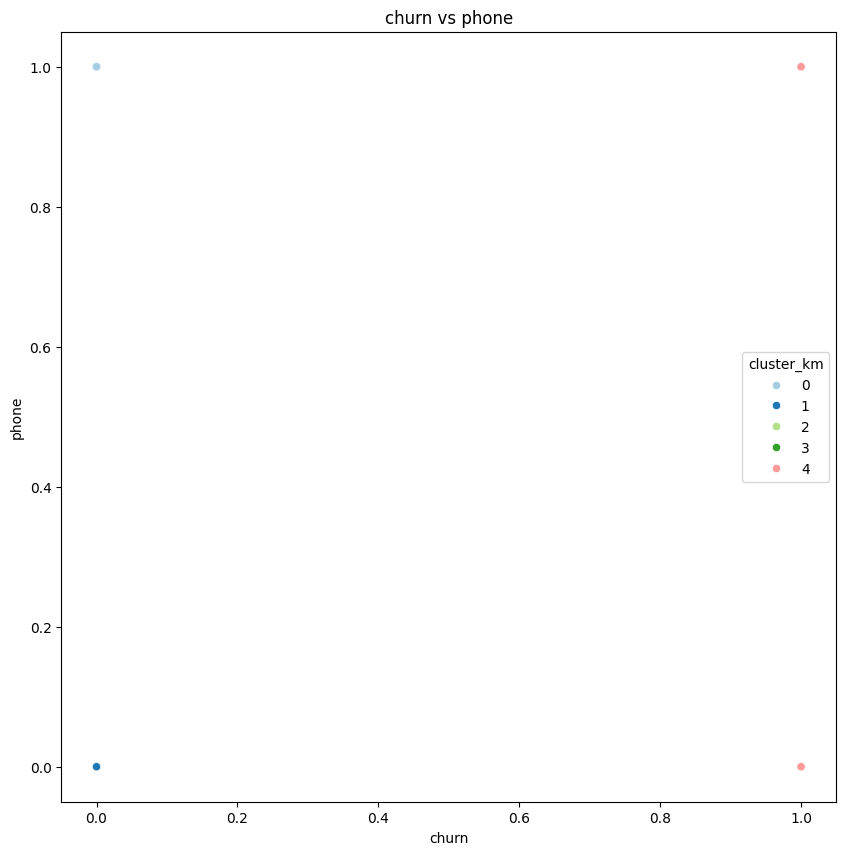

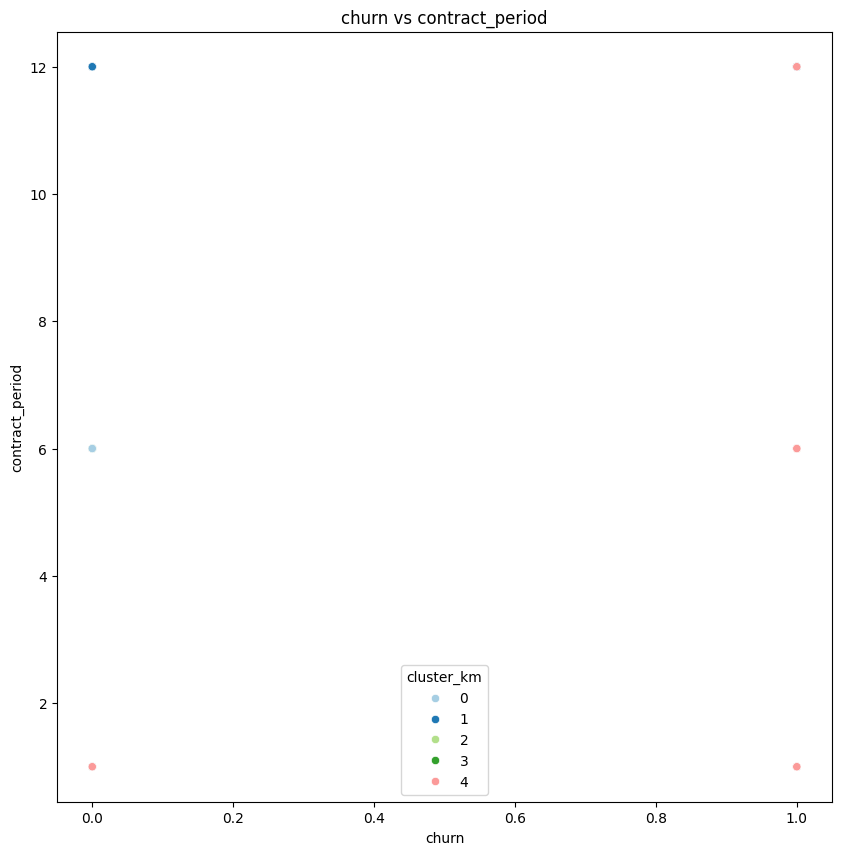

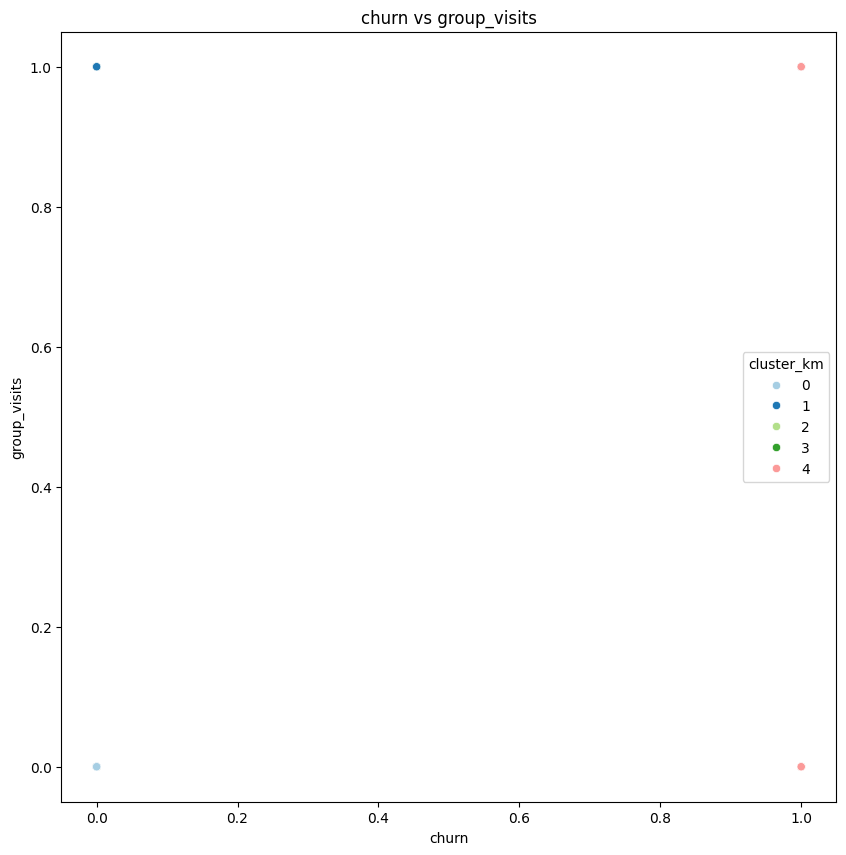

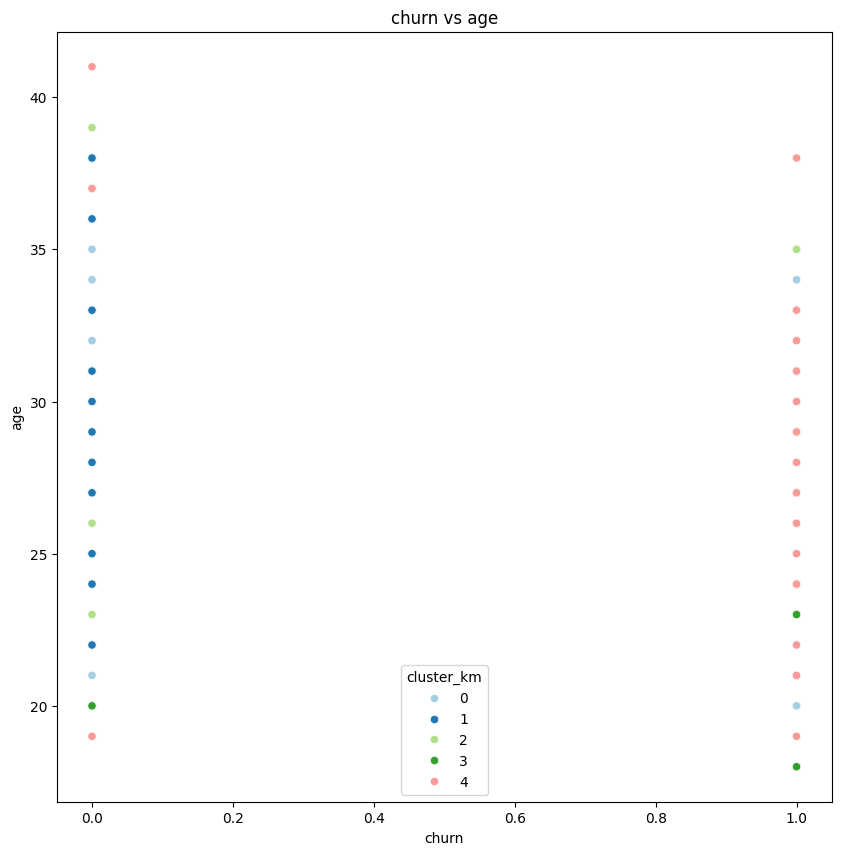

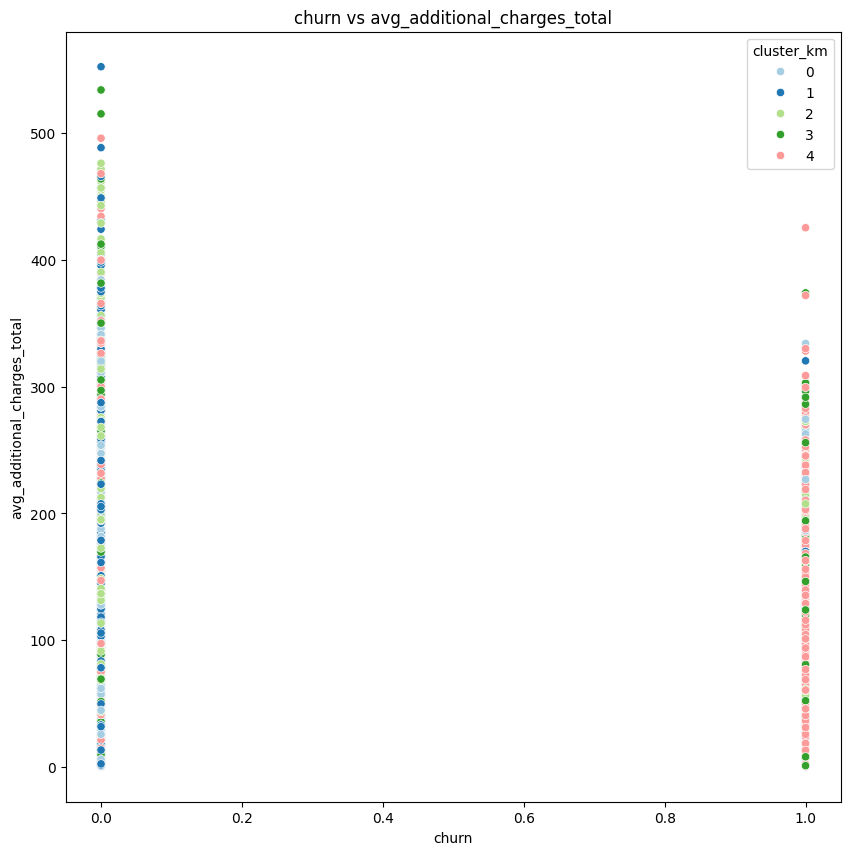

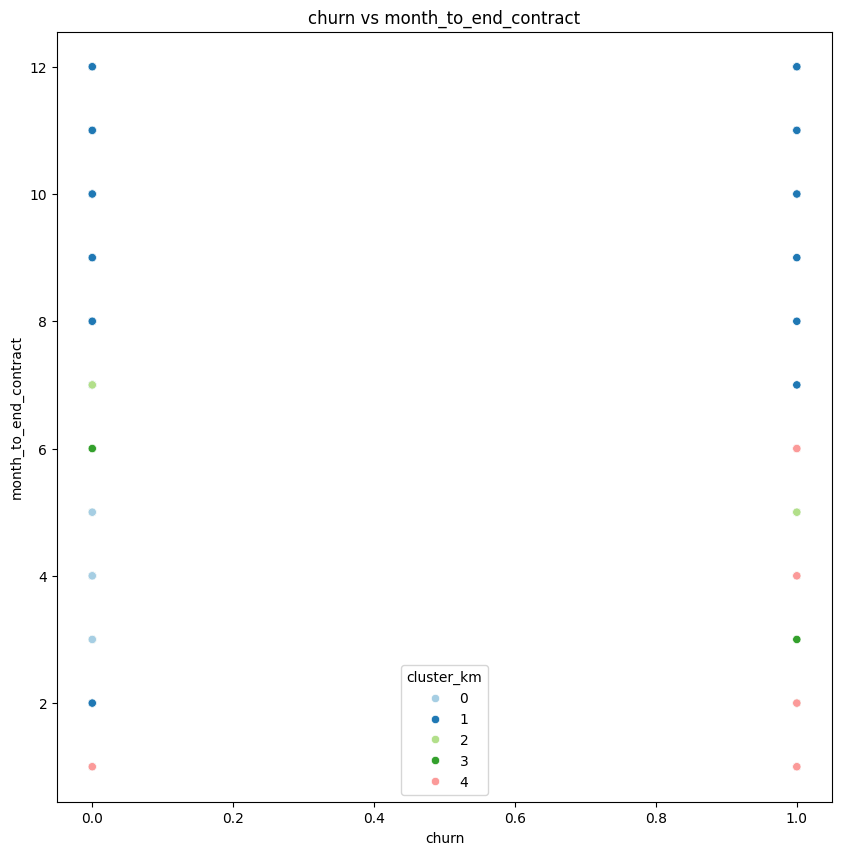

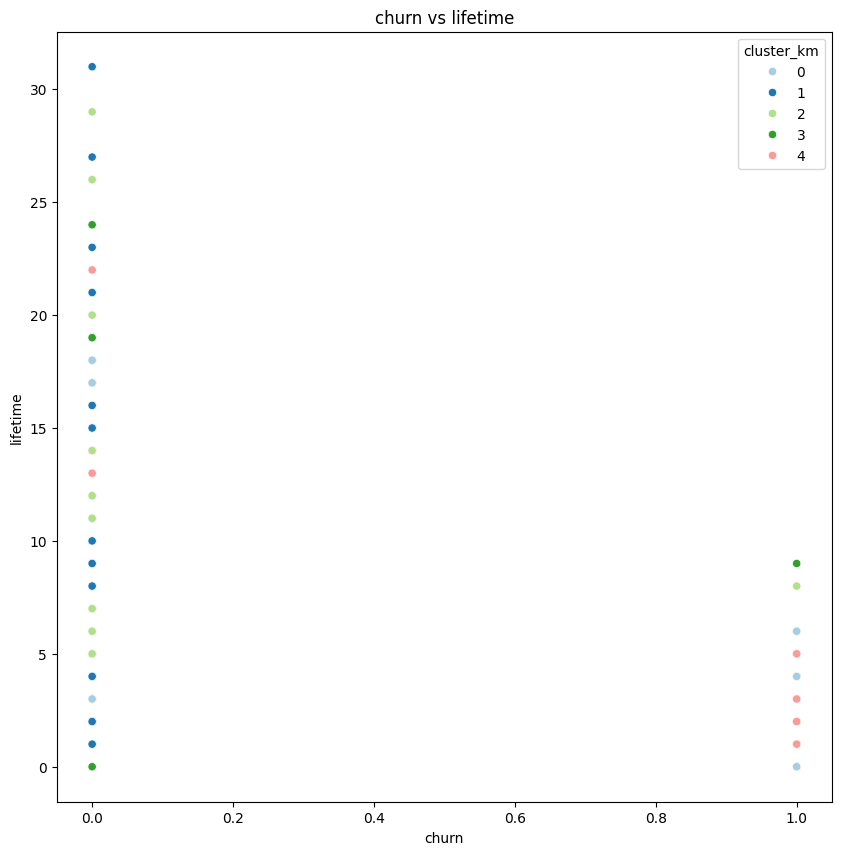

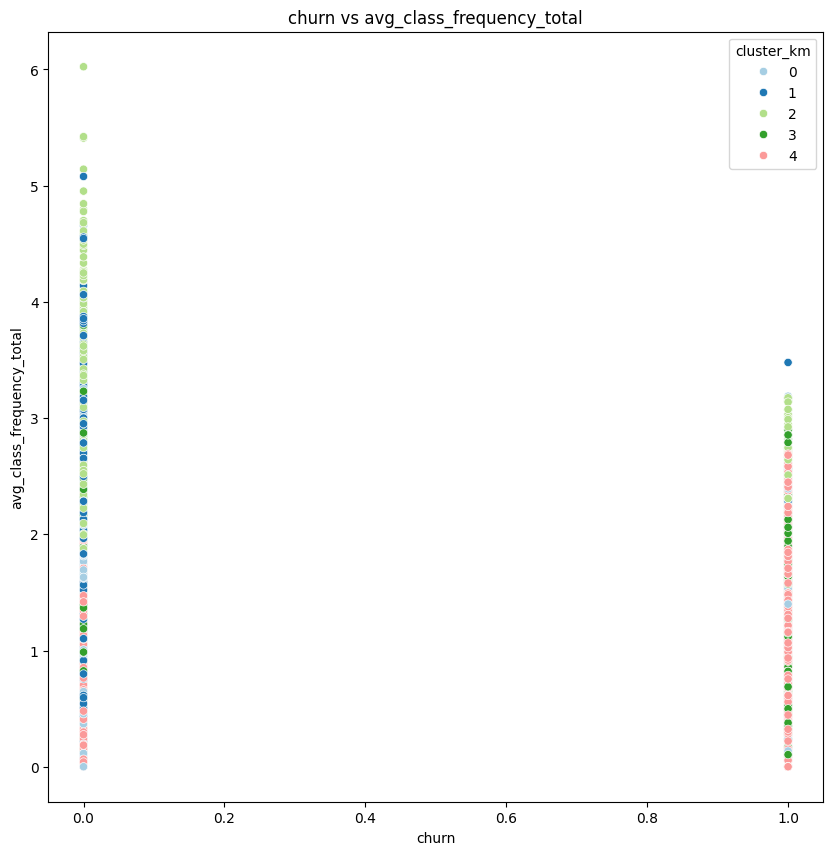

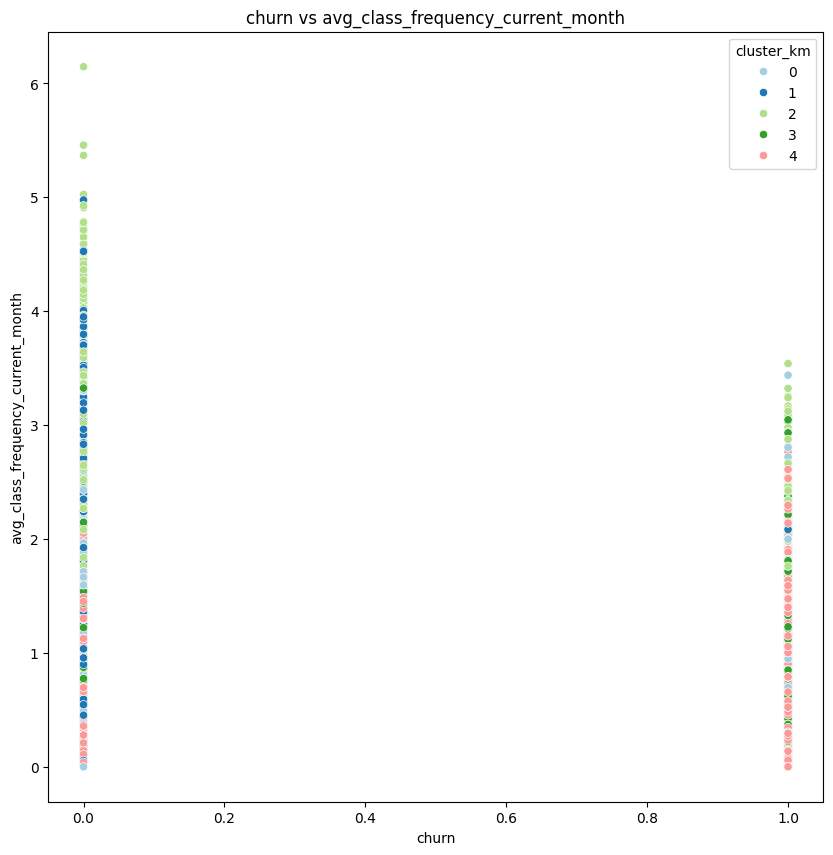

In [ ]:
# Define la función para representar gráficos de características pareadas para los clústeres
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(data=df, x= df[x_name], y=df[y_name],
                    hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# representa el gráfico para las características pareadas,
#'churn' es la métrica objetivo
for col in data_clusters.drop('churn',axis=1).columns:
    show_clusters_on_plot(data,'churn',col, 'cluster_km')


### 4.5 Tasa de cancelación para cada clúster

*Resultados:*

Los clusteres con mayor lealtad son el 3 (98%), 0 (93%), 4 (74%), y los grupos más propensos a irse son  1 (56%), 2(49%).

NOTA: Los porcentacjes usados son de retención.


In [ ]:
data.groupby(by='cluster_km').mean()
display(data_clusters['churn'])

cluster_km
0    0.441815
1    0.523114
2    0.027586
3    0.266839
4    0.071013
Name: churn, dtype: float64

## 5. Conclusiones


En conclusión, algunas de las recomendasiones son:

1. Seguir y aumentar el programa 'partner' con empresas del vecindario: como se observo en los clusters e histogramas,  el grupo retenido tiene a tener mayor edad (age), capacidad economica( avd_additional_charges). Además se puede exponenciar los resultados del programa partner que vimos en los histogramas, si se enfoca a las empresas dentro del vencindario, ya que los que permanecen tiene una proporción mayor (5 veces mayor) de usuarios que viven o trabajan cerca del gimnasio.
2. Dar acceso gratuito, promociones o incentivos a asistir a sesiones en grupo a los usuarios con mesnos de 5 meses de antigüedad: Se requiere generar en ellos hábitos, se observa que una vez superados los 4 meses de lifetime (histogramas,clusters) los usuarios suelen permanecer. Las sesiones grupales es una idea para aumentar la frecuencia semanal de asistencia, que es un parámetro que si disminuye en el ultimomes es un indicador de una pronta deserción. Además se sustenta en el histograma de 'group_visits' ya que los que deciden quedarse tienden más a asistir a clases guiadas a diferencia de los que se marchan.
3. Descuentos conforme a la longitud del contrato: Observamos que los que permanecen suelen tener contratos de mayor cantidad de meses, podemos dar pequeños descuentos para que el cliente pague incialmente un contrato largo.